<h1><center>Travail Pratique d'infocentre</center></h1>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (1)

In [33]:
fonction = pd.read_excel('C:/Users/Ir Donnel/Documents/mes documents/dataset_Donnel_Mbonzi_Mukumbila/data_vin.xlsx')

In [34]:
fonction.head()

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


### (2)

In [35]:
fonction.describe()

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### (3) 

In [36]:
from sklearn.cluster import KMeans

In [37]:
model = KMeans(n_clusters = 10)
model.fit(fonction)
valeur = model.labels_
valeur

array([0, 0, 0, ..., 2, 2, 2])

segmentation en 10 classes

### (4) 

In [39]:
taille = np.unique(valeur,return_counts=True)
taille

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([822, 529, 832, 528, 532, 836, 527, 529, 828, 534]))

In [40]:
fonction['qualité'] = valeur
fonction.to_csv('vin_quality.csv')

In [41]:
fonction.head()

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qualité
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


### (5) 

In [42]:
from sklearn.decomposition import PCA

In [43]:
modele = PCA(n_components=2)
extraire = modele.fit_transform(fonction)

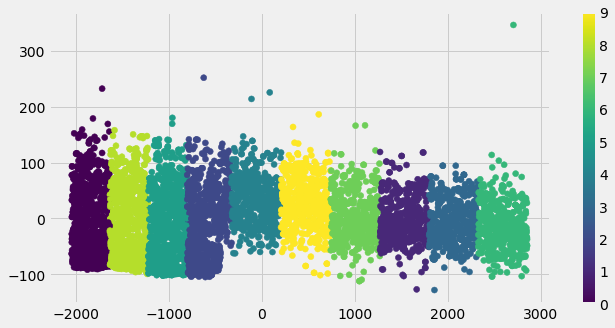

In [44]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 5))
plt.scatter(extraire[:,0],extraire[:,1], c=valeur);
plt.colorbar();

### (6)

In [45]:
fonction.groupby(['qualité']).describe()

ID_individu                                                    \
              count         mean         std     min      25%     50%   
qualité                                                                 
0             822.0   205.000000  118.717364     0.0   102.25   205.0   
1             529.0  3578.000000  152.853416  3314.0  3446.00  3578.0   
2             832.0  1454.822115  127.378217  1241.0  1346.75  1450.5   
3             528.0  4106.500000  152.564740  3843.0  3974.75  4106.5   
4             532.0  1984.498120  153.722700  1718.0  1851.75  1984.5   
5             836.0  1033.504785  120.750552   824.0   929.00  1033.5   
6             527.0  4634.000000  152.276065  4371.0  4502.50  4634.0   
7             529.0  3049.000000  152.853416  2785.0  2917.00  3049.0   
8             828.0   617.501208  119.585484   411.0   514.00   617.5   
9             534.0  2517.500000  154.296792  2251.0  2384.25  2517.5   

                         fixed_acidity            ... sulphates       alcohol  \
             75%     max         count      mean  ...       75%   max   count   
qualité                                           ...                           
0         307.75   410.0         822.0  7.642822  ...     0.660  2.00   822.0   
1        3710.00  3842.0         529.0  6.701701  ...     0.550  0.88   529.0   
2        1554.25  1719.0         832.0  7.307332  ...     0.620  1.33   832.0   
3        4238.25  4370.0         528.0  6.590152  ...     0.550  0.98   528.0   
4        2117.25  2250.0         532.0  7.309023  ...     0.550  0.92   532.0   
5        1138.00  1245.0         836.0  7.639474  ...     0.660  1.34   836.0   
6        4765.50  4897.0         527.0  6.271917  ...     0.555  1.08   527.0   
7        3181.00  3313.0         529.0  6.669943  ...     0.530  0.99   529.0   
8         721.00   825.0         828.0  8.019324  ...     0.650  1.62   828.0   
9        2650.75  2784.0         534.0  7.007959  ...     0.580  1.06   534.0   

                                                              
              mean       std  min   25%   50%     75%    max  
qualité                                                       
0        10.054501  1.006809  8.5   9.3   9.8  10.500  14.00  
1        10.955577  1.331698  8.4   9.8  11.0  12.100  13.90  
2        10.525060  1.085329  8.5   9.7  10.4  11.200  14.00  
3        10.644154  1.306309  8.4   9.5  10.5  11.525  14.20  
4        10.101692  1.052616  8.6   9.2   9.9  10.725  13.00  
5        10.633732  1.125538  8.5   9.6  10.5  11.400  14.00  
6        10.889311  1.259673  8.7   9.8  10.9  11.800  14.05  
7        11.013233  1.237182  8.0  10.0  11.0  12.000  14.00  
8        10.181763  1.064654  8.4   9.4   9.8  10.800  14.90  
9        10.241386  1.100670  8.0   9.4  10.0  10.900  13.50  

[10 rows x 96 columns]

### (7) 

In [46]:
hello = ['ID_individu', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [47]:
X = fonction[hello]
y = valeur

In [48]:
from sklearn.model_selection import train_test_split# module qui permet de separer les données

In [49]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)# je garde 20% de données pour le test

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### (8) 

In [51]:
for model in (model_1, model_2,model_3,model_4,model_5):
    print(model.__class__.__name__,':', "%.2f"%(model.score(X_test, y_test)*100),"%")#évaluation de données de test

LogisticRegression : 7.00 %
MLPClassifier : 6.69 %
DecisionTreeClassifier : 8.23 %
DecisionTreeClassifier : 8.23 %
KNeighborsClassifier : 8.23 %


l'algorithme qui a le score le plus élevé est l'arbre de decison(avec gini et entropy)

### (9) 

In [52]:
scientis = (4018,6.4,0.18,0.48,18.0,0.054,56.0,183.0,1.00038,2.98,0.61,8.5)# prediction de la qualité d'un vin pris au hasard dans le nouveau dataset data_vin_quality

scientis_numpy = np.asarray(scientis)

scientis_reshaped = scientis_numpy.reshape(1, -1)

regression = model.predict(scientis_reshaped)



if(regression[0]==0):
    print("classe",regression)

elif(regression[0]==1):
    print("classe",regression)
elif(regression[0]==2):
    print("classe",regression)
elif(regression[0]==3):
    print("classe",regression)
elif(regression[0]==4):
    print("classe",regression)
elif(regression[0]==5):
    print("classe",regression)
elif(regression[0]==6):
    print("classe",regression)
elif(regression[0]==7):
    print("classe",regression)
elif(regression[0]==8):
    print("classe",regression)
elif(regression[0]==9):
    print("classe",regression)
        
else:
    print("classe n'existe pas")
    

ce vin appartient à la classe [9]
